# Graded Lab - Forest Fire Prevention 🔥🌳

**INDEX**
1. [Distributions](#distributions)
2. [Descriptive Statistics](#descriptive-statistics)
3. [Correlation](#correlation)
4. [Probabilities](#probabilities)
5. [Distributions](#distributions)

In [1]:
# load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = pd.read_csv("data/forestfires_processed.csv")

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 52.6+ KB


## Distributions

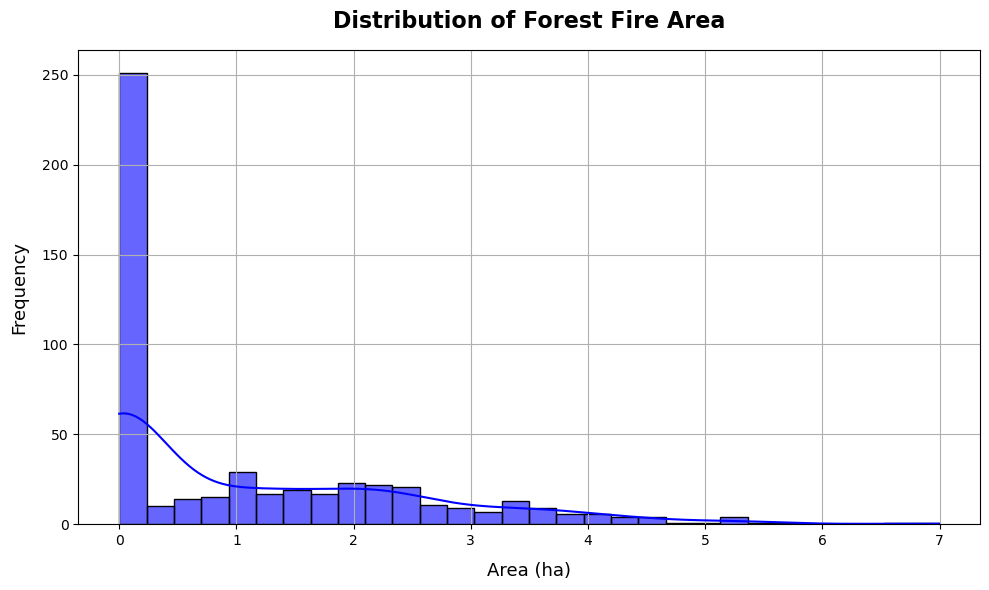

In [4]:
# plot the distribution of the `area` column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['area'], bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Forest Fire Area', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('Area (ha)', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

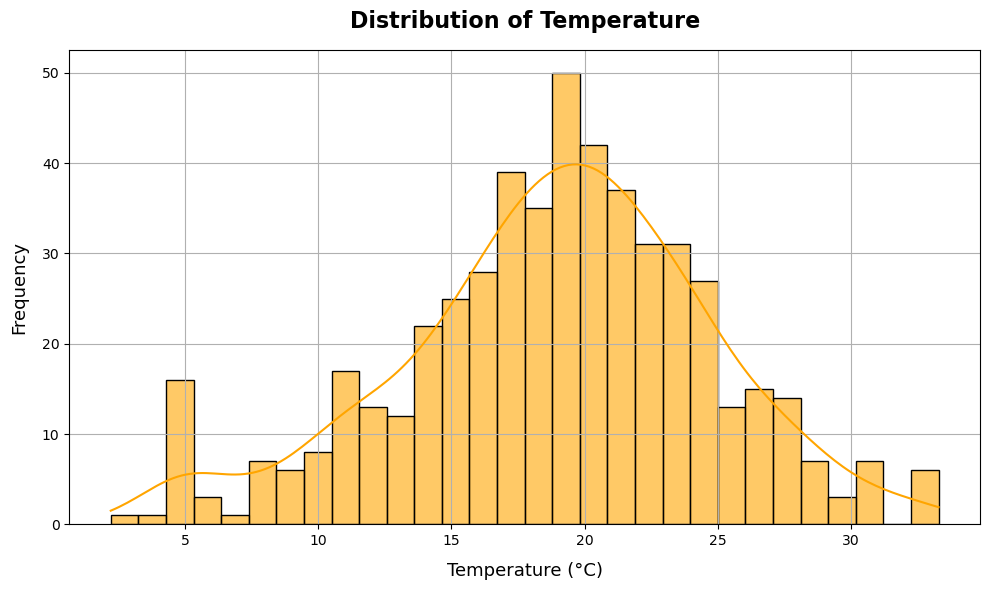

In [5]:
# plot the distribution for temperature
plt.figure(figsize=(10, 6))
sns.histplot(dataset['temp'], bins=30, kde=True, color='orange', alpha=0.6)
plt.title('Distribution of Temperature', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('Temperature (°C)', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

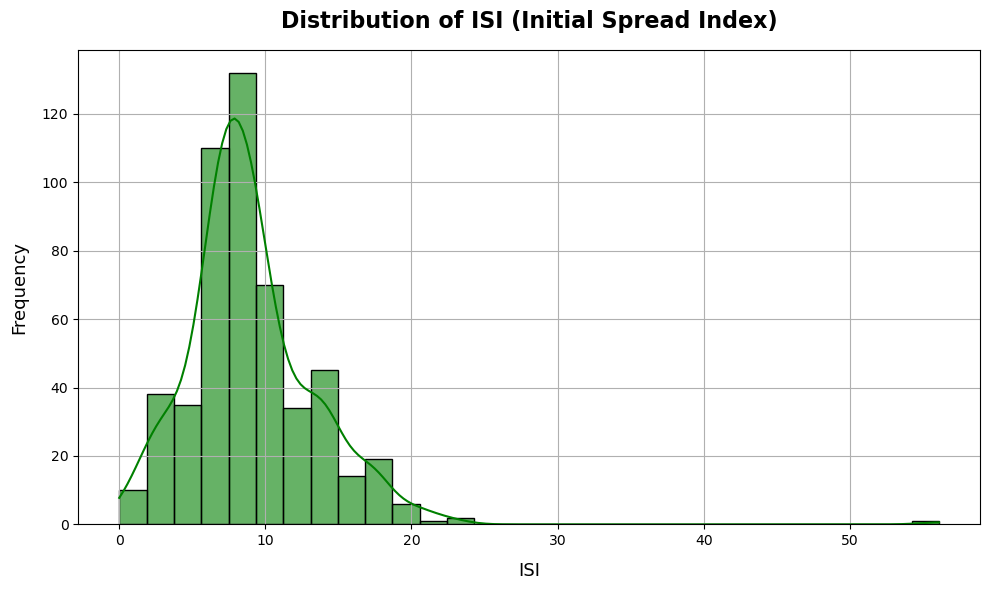

In [6]:
# plot the distribution of `ISI` column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['ISI'], bins=30, kde=True, color='green', alpha=0.6)
plt.title('Distribution of ISI (Initial Spread Index)', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('ISI', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

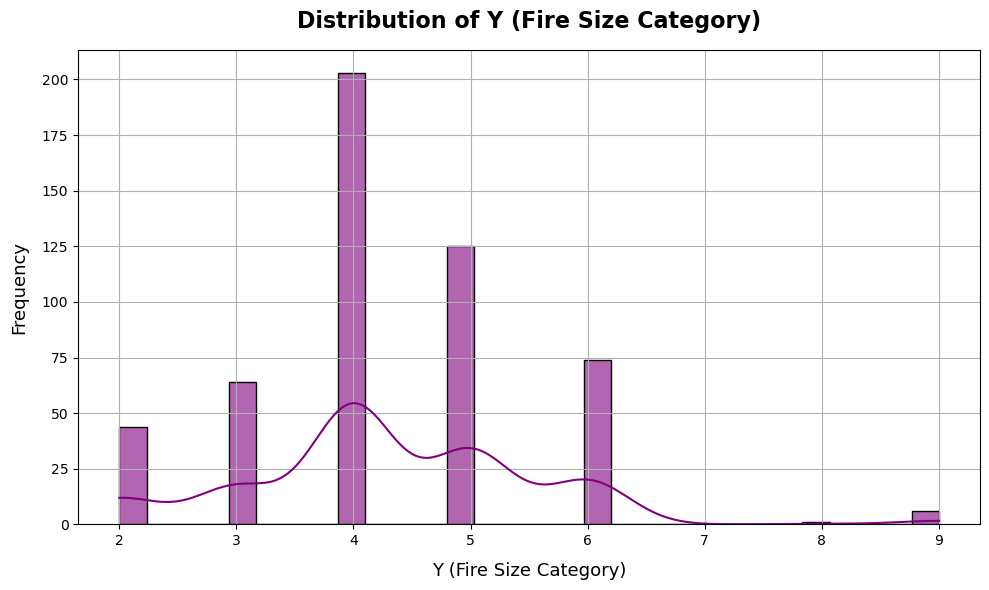

In [7]:
# plot the distribution of the `Y` column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Y'], bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribution of Y (Fire Size Category)', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('Y (Fire Size Category)', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## Descriptive Statistics

In [8]:
# calculate the mean of the features area, temp, ISI and Y
mean_values = dataset[['area', 'temp', 'ISI', 'Y']].mean()
print("Mean Values:")
print(mean_values)

Mean Values:
area     1.111026
temp    18.889168
ISI      9.021663
Y        4.299807
dtype: float64


In [9]:
# calculate the median of the features area, temp, ISI and Y
median_values = dataset[['area', 'temp', 'ISI', 'Y']].median()
print("\nMedian Values:")
print(median_values)


Median Values:
area     0.41871
temp    19.30000
ISI      8.40000
Y        4.00000
dtype: float64


In [10]:
# calculate the mode of feature Y (the categorical feature)
mode_y = dataset['Y'].mode()[0]
print("\nMode of Y (Fire Size Category):")
print(mode_y)


Mode of Y (Fire Size Category):
4


In [11]:
# calculate the standard deviation of the features area, temp, ISI and Y
std_values = dataset[['area', 'temp', 'ISI', 'Y']].std()
print("\nStandard Deviation Values:")
print(std_values)


Standard Deviation Values:
area    1.398436
temp    5.806625
ISI     4.559477
Y       1.229900
dtype: float64


In [12]:
# calculate the skewness of the features area, temp, ISI and Y
skewness_values = dataset[['area', 'temp', 'ISI', 'Y']].skew()
print("\nSkewness Values:")
print(skewness_values)


Skewness Values:
area    1.217838
temp   -0.331172
ISI     2.536325
Y       0.417296
dtype: float64


## Correlation

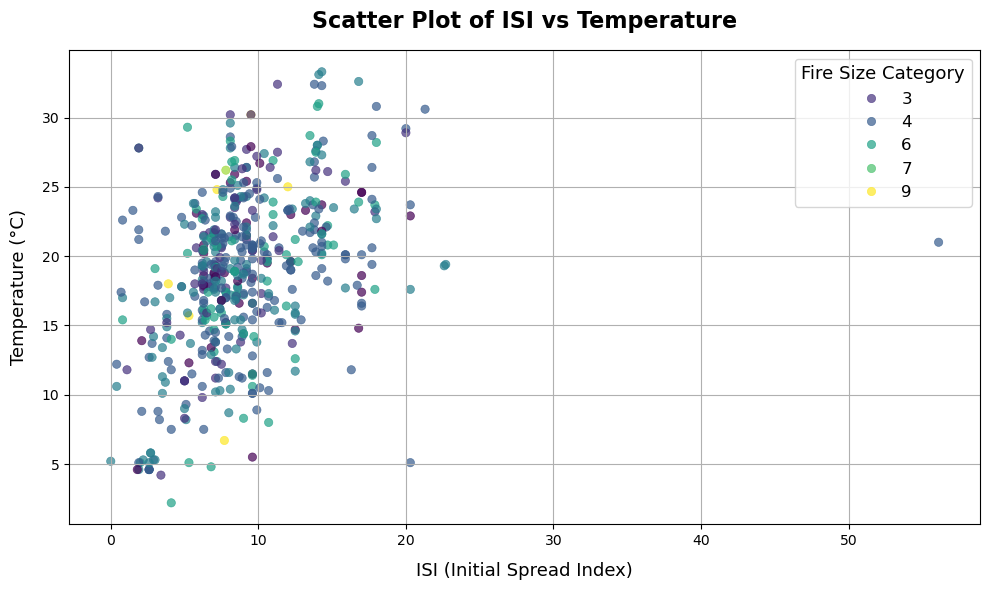

In [14]:
# create a scatter plot for the features ISI and temp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ISI', y='temp', hue='Y',
                palette='viridis', alpha=0.7, edgecolor=None)
plt.title('Scatter Plot of ISI vs Temperature', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('ISI (Initial Spread Index)', fontsize=13, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=13, labelpad=10)
plt.legend(title='Fire Size Category', fontsize=12, title_fontsize='13')
plt.grid(True)
plt.tight_layout()
plt.show()

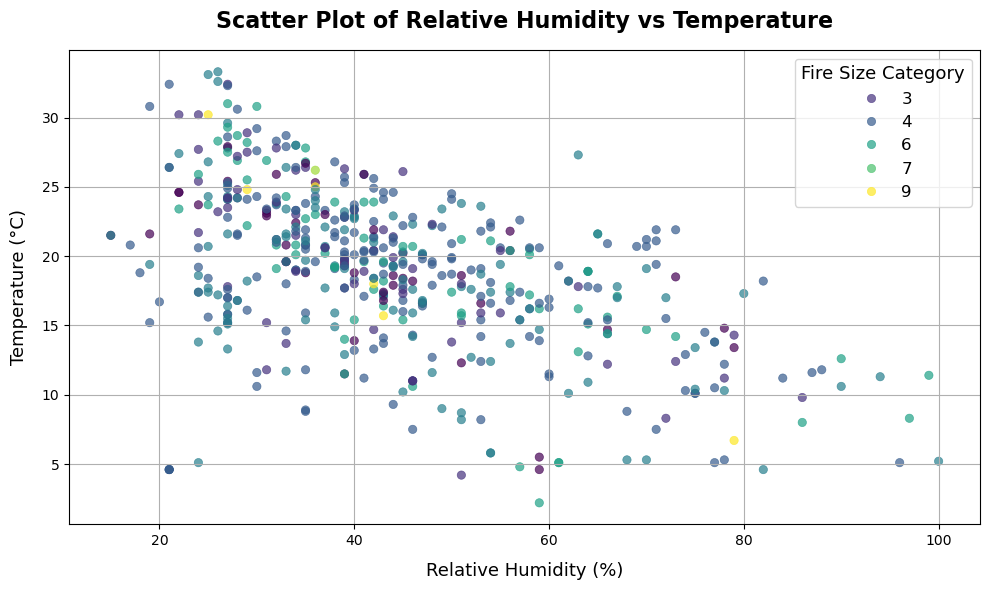

In [15]:
# create a scatter plot for RH and temp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='RH', y='temp', hue='Y',
                palette='viridis', alpha=0.7, edgecolor=None)
plt.title('Scatter Plot of Relative Humidity vs Temperature', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('Relative Humidity (%)', fontsize=13, labelpad=10)
plt.ylabel('Temperature (°C)', fontsize=13, labelpad=10)
plt.legend(title='Fire Size Category', fontsize=12, title_fontsize='13')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# calculate the correlation between ISI and temp
correlation_isi_temp = dataset['ISI'].corr(dataset['temp'])
print("\nCorrelation between ISI and Temperature:")
print(correlation_isi_temp)

# calculate the correlation between RH and temp
correlation_rh_temp = dataset['RH'].corr(dataset['temp'])
print("\nCorrelation between Relative Humidity and Temperature:")
print(correlation_rh_temp)


Correlation between ISI and Temperature:
0.39428710420800556

Correlation between Relative Humidity and Temperature:
-0.5273903386376693


## Probabilities

In [19]:
# calculate the frequency of forest firest that occur at the X coordinate of 2
frequency_x2 = dataset[dataset['X'] == 2].shape[0]
print("\nFrequency of Forest Fires at X coordinate 2:")
print(frequency_x2)

# calculate P(X=2)
total_fires = dataset.shape[0]
probability_x2 = frequency_x2 / total_fires
print("\nProbability of Forest Fires at X coordinate 2:")
print(probability_x2)


Frequency of Forest Fires at X coordinate 2:
73

Probability of Forest Fires at X coordinate 2:
0.14119922630560927


In [20]:
# calculate the frequency of forest fires that represent a small area (<0.5 ha)
frequency_small_area = dataset[dataset['area'] < 0.5].shape[0]
print("\nFrequency of Forest Fires with Area < 0.5 ha:")
print(frequency_small_area)

# calculate P(area < 0.5 ha)
total_fires = dataset.shape[0]
probability_small_area = frequency_small_area / total_fires
print("\nProbability of Forest Fires with Area < 0.5 ha:")
print(probability_small_area)


Frequency of Forest Fires with Area < 0.5 ha:
262

Probability of Forest Fires with Area < 0.5 ha:
0.5067698259187621


In [ ]:
# calculate the frequency of forest fires with small area (<0.5 ha) and X coordinate of 2
frequency_small_area_x2 = dataset[(dataset['area'] < 0.5) & (dataset['X'] == 2)].shape[0]
print("\nFrequency of Forest Fires with Area < 0.5 ha and X coordinate 2:")
print(frequency_small_area_x2)

# calculate P(area < 0.5 ha and X = 2)
total_fires = dataset.shape[0]
probability_small_area_x2 = frequency_small_area_x2 / total_fires
print("\nProbability of Forest Fires with Area < 0.5 ha and X coordinate 2:")
print(probability_small_area_x2)

# calculate P(area < 0.5 ha | X = 2)

# P(A/B) = P(A and B) / P(B)

probability_small_area_given_x2 = probability_small_area_x2 / probability_x2
print("\nConditional Probability P(area < 0.5 ha | X = 2):")
print(probability_small_area_given_x2)



Frequency of Forest Fires with Area < 0.5 ha and X coordinate 2:
33

Probability of Forest Fires with Area < 0.5 ha and X coordinate 2:
0.06382978723404255

Conditional Probability P(area < 0.5 ha | X = 2):
0.452054794520548


## Distributions

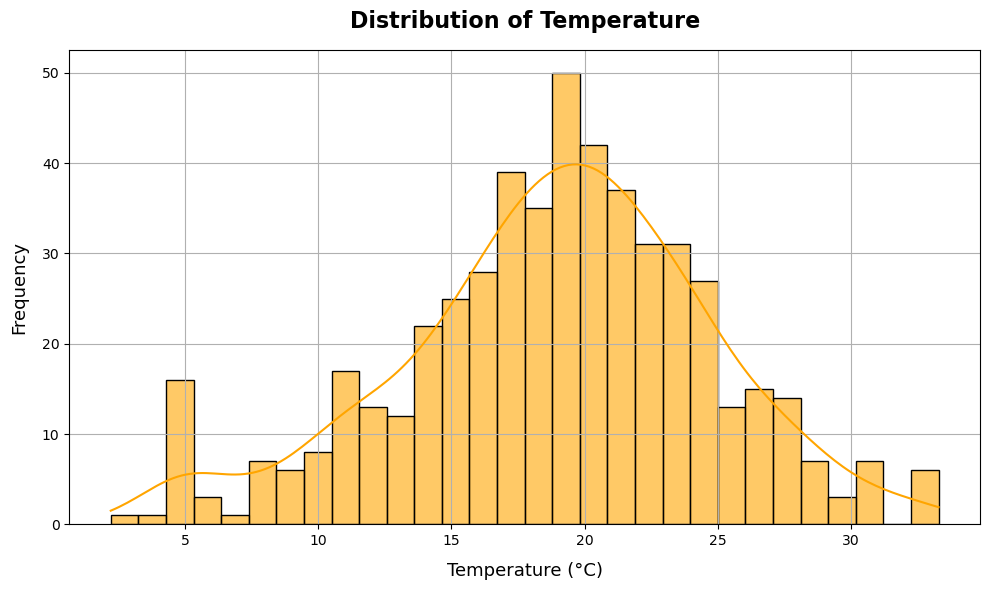

In [25]:
# histogram of temp
plt.figure(figsize=(10, 6))
sns.histplot(dataset['temp'], bins=30, kde=True, color='orange', alpha=0.6)
plt.title('Distribution of Temperature', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('Temperature (°C)', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Distribution Type: **Approximately Normal (Gaussian)**
    - Symmetrical bell-shaped curve
    - Single peak (unimodal)
    - Gradual decline on both sides
    - The fitted KDE line closely matches a normal distribution.

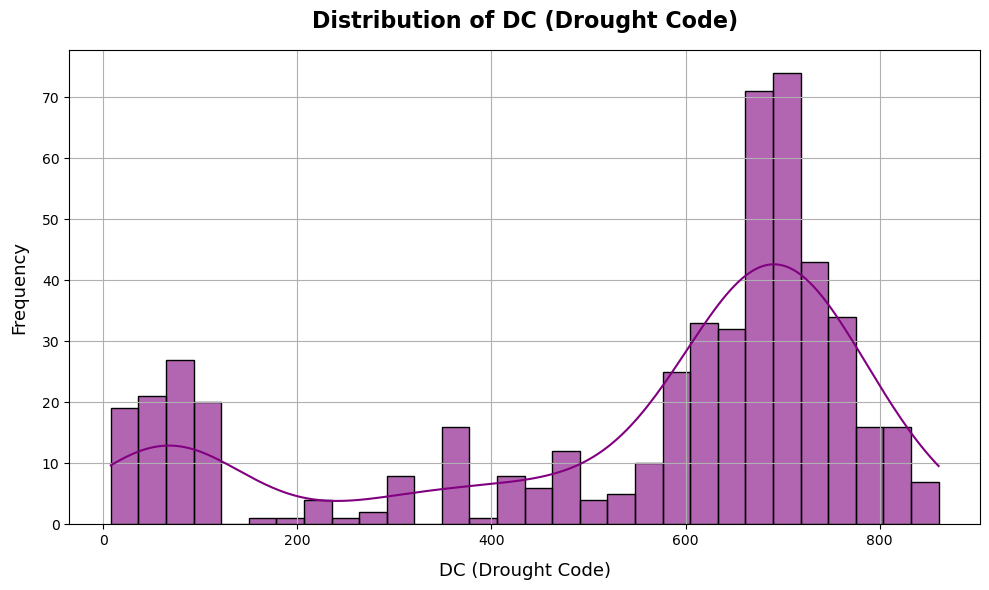

In [26]:
# histogram of DC
plt.figure(figsize=(10, 6))
sns.histplot(dataset['DC'], bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribution of DC (Drought Code)', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('DC (Drought Code)', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Distribution Type: **Bimodal or Multimodal**
    - There appear to be two distinct peaks, one around 100 and another around 700.
    - This suggests a mixture of distributions, possibly due to seasonal or regional effects.
    - It is not normally distributed — the shape is skewed and lumpy.

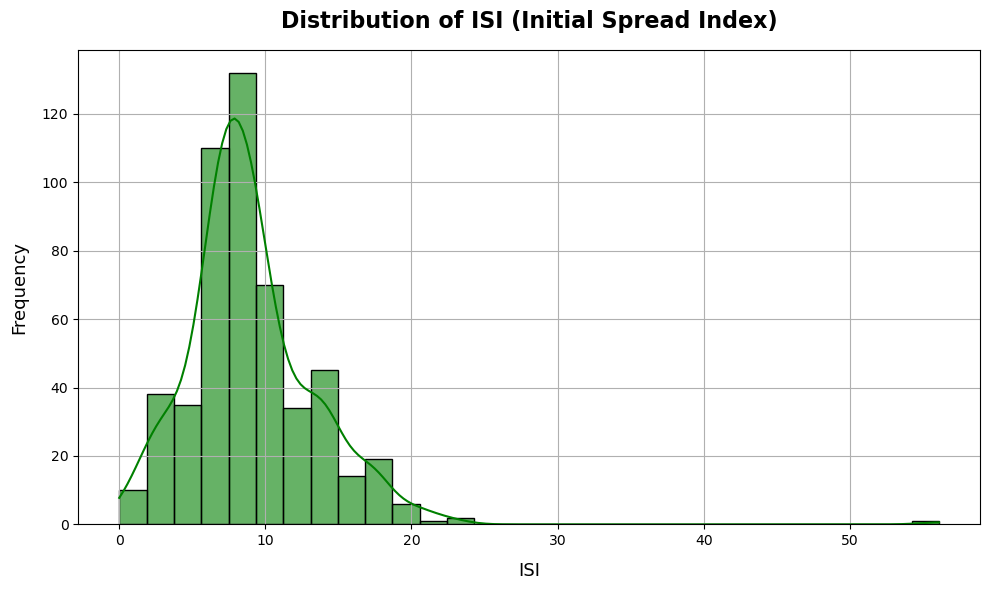

In [27]:
# histogram of ISI
plt.figure(figsize=(10, 6))
sns.histplot(dataset['ISI'], bins=30, kde=True, color='green', alpha=0.6)
plt.title('Distribution of ISI (Initial Spread Index)', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('ISI', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Distribution Type: **Right-Skewed / Log-Normal or Exponential-like**
    - The data is heavily skewed to the right
    - Most values are clustered near the low end, with a long tail stretching right
    - Common in rate-based or intensity-type variables



/var/folders/55/x1yqz6851xj6j2f0smdhs4jh0000gn/T/ipykernel_15733/3464014868.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='is_small_fire', palette='Set2', alpha=0.7)


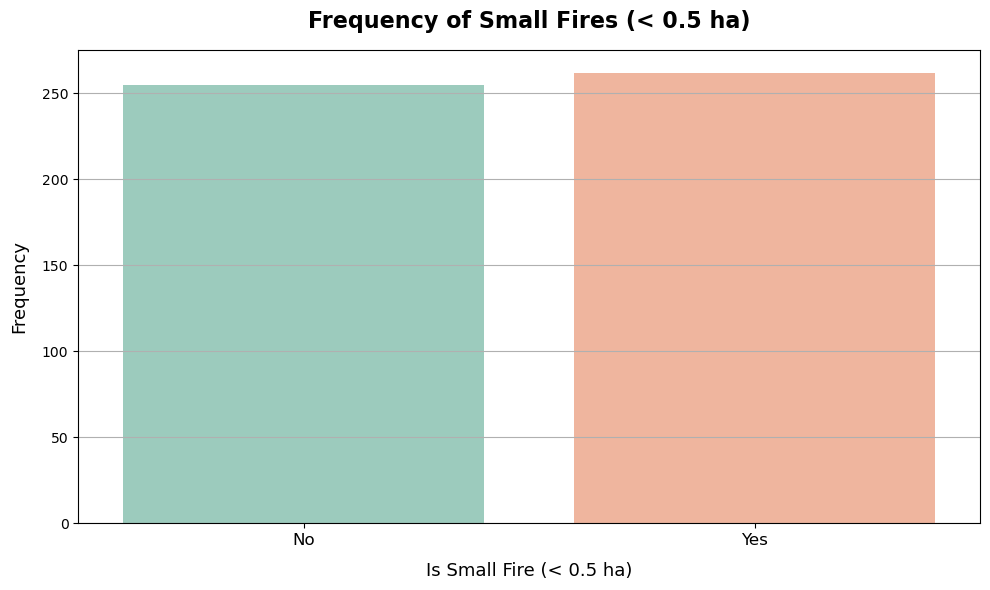

In [28]:
# create a new feature `is_small_fire` to indicate if the fire area is small (<0.5 ha)
dataset['is_small_fire'] = dataset['area'] < 0.5

# create a bar chart to visualize the frequency of small fires
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='is_small_fire', palette='Set2', alpha=0.7)
plt.title('Frequency of Small Fires (< 0.5 ha)', fontsize=16, fontweight='bold', pad=16)
plt.xlabel('Is Small Fire (< 0.5 ha)', fontsize=13, labelpad=10)
plt.ylabel('Frequency', fontsize=13, labelpad=10)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The graph above shows a **Bernoulli Distribution**, which models a random experiment that has only two possible outcomes. These outcomes are typically labeled as 0 and 1, and they are often referred to as "failure" and "success."